In [173]:
#importing library
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [174]:
#loading the dataset
train_df=pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/train.csv')
test_df=pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/test.csv')

In [175]:

train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [176]:
test_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [177]:
sample_submission=pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv')
sample_submission

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


In [178]:
#getting information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [179]:
#checking for null values
train_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [180]:
#checking for null values in test dataset
test_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

# Encoding

In [181]:
#categorical features
categorical_features=['Gender','Vehicle_Age','Vehicle_Damage']

In [182]:
#getting unique values
def get_unique(df,columns):
    return {column:list(df[column].unique()) for column in columns}

In [183]:
get_unique(train_df,categorical_features)

{'Gender': ['Male', 'Female'],
 'Vehicle_Age': ['> 2 Years', '1-2 Year', '< 1 Year'],
 'Vehicle_Damage': ['Yes', 'No']}

In [184]:
age_ordering=['< 1 Year','1-2 Year','> 2 Years']

In [185]:
binary_features=['Gender','Vehicle_Damage']
ordinal_features=['Vehicle_Age']

In [186]:
train_df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

# Binary Encoding Function

In [187]:
#creating a binary function
def binary_encode(df,column,positive_label):
    #creating a copy of the dataframe
    df=df.copy()
    df[column]=df[column].apply(lambda x:1 if x==positive_label else 0)
    #returning the dataframe
    return df

# Ordinal Function

In [188]:
def ordinal_encode(df,column,ordering):
    df=df.copy()
    df[column]=df[column].apply(lambda x:ordering.index(x))
    return df

# Applying Ordinal function to the dataset

In [189]:
train_df=ordinal_encode(train_df,'Vehicle_Age',age_ordering)
test_df=ordinal_encode(test_df,'Vehicle_Age',age_ordering)

In [190]:
train_df=binary_encode(train_df,'Gender','Male')
train_df=binary_encode(train_df,'Vehicle_Damage','Yes')

In [191]:
test_df=binary_encode(test_df,'Gender','Male')
test_df=binary_encode(test_df,'Vehicle_Damage','Yes')

In [192]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,1,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,0,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,0,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [193]:
test_ids=test_df['id'].tolist()
train_df=train_df.drop('id',axis=1)
test_df=test_df.drop('id',axis=1)

In [194]:
train_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,1,0,30170.0,26.0,88,0
381105,1,30,1,37.0,1,0,0,40016.0,152.0,131,0
381106,1,21,1,30.0,1,0,0,35118.0,160.0,161,0
381107,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [195]:
test_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,1,11.0,1,0,0,35786.0,152.0,53
1,1,40,1,28.0,0,1,1,33762.0,7.0,111
2,1,47,1,28.0,0,1,1,40050.0,124.0,199
3,1,24,1,27.0,1,0,1,37356.0,152.0,187
4,1,27,1,28.0,1,0,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...
127032,0,26,1,37.0,1,0,0,30867.0,152.0,56
127033,0,38,1,28.0,0,1,1,28700.0,122.0,165
127034,1,21,1,46.0,1,0,0,29802.0,152.0,74
127035,1,71,1,28.0,1,1,0,62875.0,26.0,265


In [196]:
y=train_df['Response']
x=train_df.drop('Response',axis=1)

<AxesSubplot:>

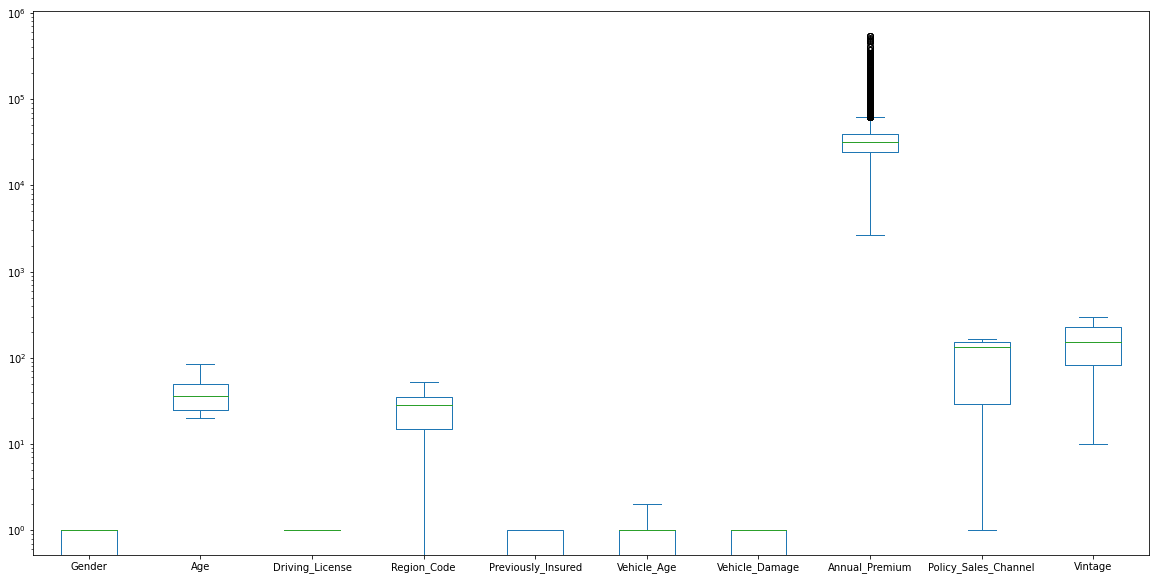

In [197]:
x.plot(kind='box',figsize=(20,10),logy=True)

In [198]:
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
test_df=pd.DataFrame(scaler.fit_transform(test_df),columns=test_df.columns)

In [199]:
x

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1.0,0.369231,1.0,0.538462,0.0,1.0,1.0,0.070366,0.154321,0.716263
1,1.0,0.861538,1.0,0.057692,0.0,0.5,0.0,0.057496,0.154321,0.598616
2,1.0,0.415385,1.0,0.538462,0.0,1.0,1.0,0.066347,0.154321,0.058824
3,1.0,0.015385,1.0,0.211538,1.0,0.0,0.0,0.048348,0.932099,0.667820
4,0.0,0.138462,1.0,0.788462,1.0,0.0,0.0,0.046259,0.932099,0.100346
...,...,...,...,...,...,...,...,...,...,...
381104,1.0,0.830769,1.0,0.500000,1.0,0.5,0.0,0.051234,0.154321,0.269896
381105,1.0,0.153846,1.0,0.711538,1.0,0.0,0.0,0.069551,0.932099,0.418685
381106,1.0,0.015385,1.0,0.576923,1.0,0.0,0.0,0.060439,0.981481,0.522491
381107,0.0,0.738462,1.0,0.269231,0.0,1.0,1.0,0.078110,0.759259,0.221453


In [200]:
test_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1.0,0.076923,1.0,0.211538,1.0,0.0,0.0,0.070633,0.932099,0.148789
1,1.0,0.307692,1.0,0.538462,0.0,0.5,1.0,0.066321,0.037037,0.349481
2,1.0,0.415385,1.0,0.538462,0.0,0.5,1.0,0.079717,0.759259,0.653979
3,1.0,0.061538,1.0,0.519231,1.0,0.0,1.0,0.073978,0.932099,0.612457
4,1.0,0.107692,1.0,0.538462,1.0,0.0,0.0,0.120293,0.932099,0.993080
...,...,...,...,...,...,...,...,...,...,...
127032,0.0,0.092308,1.0,0.711538,1.0,0.0,0.0,0.060154,0.932099,0.159170
127033,0.0,0.276923,1.0,0.538462,0.0,0.5,1.0,0.055538,0.746914,0.536332
127034,1.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.057885,0.932099,0.221453
127035,1.0,0.784615,1.0,0.538462,1.0,0.5,0.0,0.128341,0.154321,0.882353


# Build and Train the Model

In [201]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [202]:
x.shape

(381109, 10)

In [203]:
y.shape

(381109,)

In [204]:
y.sum()/len(y)

0.12256336113815208

In [205]:
inputs=tf.keras.Input(shape=(10,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)

In [206]:
model=tf.keras.Model(inputs=inputs,outputs=outputs)

In [207]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')])
batch_size=64
epochs=25
history=model.fit(
    x_train,
    y_train,
        validation_split=0.2,
        batch_size=batch_size,
    epochs=epochs,
        callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
verbose=0)

2022-12-25 06:19:39.398529: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [210]:
fig=px.line(history.history,y=['loss','val_loss'],
           labels={'index':'Epoch','value':'Loss'},
           title='Training History')
fig.show()

In [209]:
model.evaluate(x_test,y_test)

2382/2382 [==============================] - 3s 1ms/step - loss: 0.2707 - auc: 0.8520


[0.27074185013771057, 0.8519529700279236]